In [ ]:
pip install networkx

In [40]:
import collections
import networkx as nx
import pandas as pd

In [45]:
def create_graph(filepath):
    # Read the CSV file
    df = pd.read_csv(filepath)
    
    print(f"Contents of {filepath}:")
    # print(df)

    # Create a directed graph object
    G = nx.DiGraph()

    # Add nodes to the graph
    nodes = list(set(df["parent"].tolist() + df["child"].tolist()))
    G.add_nodes_from(nodes)
    print(nodes)

    # Add edges with their corresponding penwidth attributes
    edges = df[["parent", "child", "weight"]].values.tolist()
    # print(filepath)
    for source, target, penwidth in edges:
        G.add_edge(source, target, penwidth=penwidth)
        # print(f"({source}, {target}, {penwidth})")

    return G


In [46]:
# Define the filepaths for the CSV files
filepaths = [
    "data/parent_child_weights.csv",
    "data_1/filename_1.csv",
    "data_2/filename_2.csv",
    "data_3/filename_3.csv"
]

# Create a new graph for each CSV file
graphs = [create_graph(filepath) for filepath in filepaths]

Contents of data/parent_child_weights.csv:
['crossfit', 'running', '1200isplenty', 'MealPrepSunday', 'PlantBasedDiet', 'vegan', 'jumprope', 'whole30', 'Fitness', 'nutrition', 'keto', 'weightlifting', 'bodybuilding', 'intermittentfasting', 'powerlifting', 'naturalbodybuilding', 'lowcarb', 'bodyweightfitness', 'Paleo']
Contents of data_1/filename_1.csv:
['crossfit', 'running', '1200isplenty', 'MealPrepSunday', 'PlantBasedDiet', 'vegan', 'whole30', 'Fitness', 'nutrition', 'keto', 'weightlifting', 'bodybuilding', 'intermittentfasting', 'powerlifting', 'naturalbodybuilding', 'lowcarb', 'yoga', 'bodyweightfitness', 'Paleo']
Contents of data_2/filename_2.csv:
['powerlifting', 'crossfit', 'running', '1200isplenty', 'naturalbodybuilding', 'keto', 'MealPrepSunday', 'lowcarb', 'jumprope', 'whole30', 'Fitness', 'nutrition', 'PlantBasedDiet', 'weightlifting', 'bodybuilding', 'intermittentfasting', 'bodyweightfitness', 'Paleo']
Contents of data_3/filename_3.csv:
['crossfit', 'running', '1200isplenty

In [47]:
def aggregate_centrality_measures(G):
    # Calculate centrality measures
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)

    # Aggregate centrality measures by community
    
    community_dict = {
        'Fitness': ['Fitness','bodybuilding','running','yoga','crossfit','weightlifting','naturalbodybuilding','powerlifting','jumprope','bodyweightfitness'],
        'Nutrition': ['nutrition', 'PlantBasedDiet', 'keto', 'vegan', 'lowcarb', 'Paleo', 'whole30', 'intermittentfasting', '1200isplenty', 'MealPrepSunday'],
    }

    # Generate community_dict based on the nodes in the graph
    community_dict = {community: [node for node in nodes if node in G.nodes] for community, nodes in community_dict.items()}

    community_degree_centrality = collections.defaultdict(float)
    community_betweenness_centrality = collections.defaultdict(float)
    community_closeness_centrality = collections.defaultdict(float)

    for community, nodes in community_dict.items():
        for node in nodes:
            if node in degree_centrality:
                community_degree_centrality[community] += degree_centrality[node]
                community_betweenness_centrality[community] += betweenness_centrality[node]
                community_closeness_centrality[community] += closeness_centrality[node]

    return {
        "community_degree_centrality": dict(community_degree_centrality),
        "community_betweenness_centrality": dict(community_betweenness_centrality),
        "community_closeness_centrality": dict(community_closeness_centrality),
    }

In [48]:
# Calculate aggregated centrality measures for each graph
aggregated_centrality_measures_list = []
for interval_graph in graphs:
    measures = aggregate_centrality_measures(interval_graph)
    aggregated_centrality_measures_list.append(measures)

# Print aggregated centrality measures for each graph
# Graph 1 : full three-month data
# Graph 2: first month data
# Graph 3: second month data
# Graph 4: third month data
for i, measures in enumerate(aggregated_centrality_measures_list):
    print(f"Graph {i+1}:")
    print("  Aggregated Degree Centrality by Community:", measures["community_degree_centrality"])
    print("  Aggregated Betweenness Centrality by Community:", measures["community_betweenness_centrality"])
    print("  Aggregated Closeness Centrality by Community:", measures["community_closeness_centrality"])


Graph 1:
  Aggregated Degree Centrality by Community: {'Fitness': 5.444444444444444, 'Nutrition': 3.3333333333333326}
  Aggregated Betweenness Centrality by Community: {'Fitness': 0.46770152505446627, 'Nutrition': 0.7055010893246187}
  Aggregated Closeness Centrality by Community: {'Fitness': 4.475559668458218, 'Nutrition': 3.328451190612294}
Graph 2:
  Aggregated Degree Centrality by Community: {'Fitness': 4.666666666666667, 'Nutrition': 4.666666666666666}
  Aggregated Betweenness Centrality by Community: {'Fitness': 0.5486383442265795, 'Nutrition': 1.0297930283224401}
  Aggregated Closeness Centrality by Community: {'Fitness': 3.9961266310663905, 'Nutrition': 3.8957267783656677}
Graph 3:
  Aggregated Degree Centrality by Community: {'Fitness': 4.941176470588235, 'Nutrition': 4.705882352941177}
  Aggregated Betweenness Centrality by Community: {'Fitness': 0.3676470588235294, 'Nutrition': 0.9044117647058824}
  Aggregated Closeness Centrality by Community: {'Fitness': 3.7897205649988597

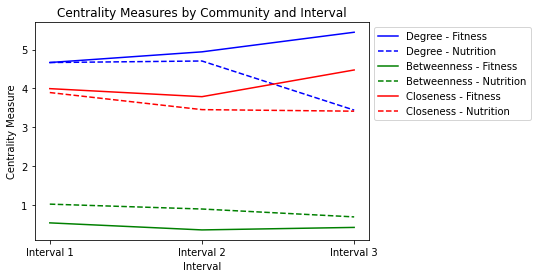

In [53]:
import matplotlib.pyplot as plt

# Centrality data for each interval
data = {
    "Interval 1": {
        "Degree": {"Fitness": 4.666666666666667, "Nutrition": 4.666666666666666},
        "Betweenness": {"Fitness": 0.5486383442265795, "Nutrition": 1.0297930283224401},
        "Closeness": {"Fitness": 3.9961266310663905, "Nutrition": 3.8957267783656677},
    },
    "Interval 2": {
        "Degree": {"Fitness": 4.941176470588235, "Nutrition": 4.705882352941177},
        "Betweenness": {"Fitness": 0.3676470588235294, "Nutrition": 0.9044117647058824},
        "Closeness": {"Fitness": 3.7897205649988597, "Nutrition": 3.456853013724733},
    },
    "Interval 3": {
        "Degree": {"Fitness": 5.444444444444444, "Nutrition": 3.444444444444444},
        "Betweenness": {"Fitness": 0.43208061002178655, "Nutrition": 0.7019063180827887},
        "Closeness": {"Fitness": 4.475559668458218, "Nutrition": 3.4171150961192738},
    },
}

# Extract data for plotting
intervals = list(data.keys())
degree_fitness = [data[i]["Degree"]["Fitness"] for i in intervals]
degree_nutrition = [data[i]["Degree"]["Nutrition"] for i in intervals]
betweenness_fitness = [data[i]["Betweenness"]["Fitness"] for i in intervals]
betweenness_nutrition = [data[i]["Betweenness"]["Nutrition"] for i in intervals]
closeness_fitness = [data[i]["Closeness"]["Fitness"] for i in intervals]
closeness_nutrition = [data[i]["Closeness"]["Nutrition"] for i in intervals]

# Plot the data
plt.plot(intervals, degree_fitness, color="blue", label="Degree - Fitness", linestyle="-")
plt.plot(intervals, degree_nutrition, color="blue", label="Degree - Nutrition", linestyle="--")
plt.plot(intervals, betweenness_fitness, color="green", label="Betweenness - Fitness", linestyle="-")
plt.plot(intervals, betweenness_nutrition, color="green", label="Betweenness - Nutrition", linestyle="--")
plt.plot(intervals, closeness_fitness, color="red", label="Closeness - Fitness", linestyle="-")
plt.plot(intervals, closeness_nutrition, color="red", label="Closeness - Nutrition", linestyle="--")

# Set labels and title
plt.xlabel("Interval")
plt.ylabel("Centrality Measure")
plt.title("Centrality Measures by Community and Interval")

# Add legend
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Adjust layout to accommodate the legend
plt.subplots_adjust(right=0.9)

plt.savefig("centrality_interval.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()
